In [1]:
import torch
from torch.utils.data import TensorDataset
x = torch.rand(3, 2)
y = torch.rand(3)
xy = TensorDataset(x, y)
# print xy length
print(len(xy))

3


In [6]:
# read the mat files
import scipy.io as sio
import numpy as np
import torch
from torch.utils.data import TensorDataset
# load the mat file
# mat_contents = sio.loadmat('datasets/dataPLANS/4.definitive/RT2/X.mat')
mat_contents = sio.loadmat('datasets/dataPLANS/4.definitive/RT12/X.mat')
# print mat_contents
# print(mat_contents)
print(mat_contents['XX'].shape)
x = mat_contents['XX']
print(x[0])

(10000, 2, 50)
[[ 289.21070793   48.22287191  998.42589404   97.2839632   512.88949697
   678.00825865  434.67487795  466.1529104   644.00644474  386.1798352
   372.69571903  236.26966854  415.8215732   629.82426707  707.94914195
   505.43333365  788.95902672  875.77237647   46.77912992  148.17171584
   855.11415697   70.13803414  113.84377416  593.64330999   80.31436852
   740.84704766  158.24011132  132.81555151  615.70768728  595.33997185
   918.98054401  399.25637895  300.50924917  742.24905857  157.96372956
   284.15897532  941.9286391    34.67776967  706.92661447  642.70931401
   114.36170086  560.32107798  961.35370334  626.46845546  538.38797647
   289.587674    941.0896232   790.06379903  820.83667623  389.65250654]
 [1006.83729313  170.13420861  338.91696667  369.7729593   112.770364
   564.65619252  433.49721107  470.1112469   822.79779037  253.87564261
   380.63074379  410.14720316  354.53029077  638.77173416  238.67877228
   694.34873214  717.19948999  931.40526099  112.98

In [6]:
# read the mat files
import scipy.io as sio
import numpy as np
import torch
from torch.utils.data import TensorDataset
# load the mat file
mat_contents = sio.loadmat('dataPLANS/4.definitive/RT13/X.mat')
# print mat_contents
# print(mat_contents)
print(mat_contents['XX'].shape)
x = mat_contents['XX']
print(x[0])

(10000, 2, 50)
[[ 289.21070793   48.22287191  998.42589404   97.2839632   512.88949697
   678.00825865  434.67487795  466.1529104   644.00644474  386.1798352
   372.69571903  236.26966854  415.8215732   629.82426707  707.94914195
   505.43333365  788.95902672  875.77237647   46.77912992  148.17171584
   855.11415697   70.13803414  113.84377416  593.64330999   80.31436852
   740.84704766  158.24011132  132.81555151  615.70768728  595.33997185
   918.98054401  399.25637895  300.50924917  742.24905857  157.96372956
   284.15897532  941.9286391    34.67776967  706.92661447  642.70931401
   114.36170086  560.32107798  961.35370334  626.46845546  538.38797647
   289.587674    941.0896232   790.06379903  820.83667623  389.65250654]
 [1006.83729313  170.13420861  338.91696667  369.7729593   112.770364
   564.65619252  433.49721107  470.1112469   822.79779037  253.87564261
   380.63074379  410.14720316  354.53029077  638.77173416  238.67877228
   694.34873214  717.19948999  931.40526099  112.98

In [8]:
# load the mat file
mat_contents = sio.loadmat('dataPLANS/4.definitive/RT13/Y.mat')
# print mat_contents
# print(mat_contents)
print(mat_contents['YY'].shape)
y = mat_contents['YY']
print(y[0])
# preprocess the y data, change the y to minumum value -10 of min(y) if y is -inf
y_copy = y.copy()
y_copy[y_copy == -np.inf] = min(y_copy[y_copy != -np.inf]) - 10
print(y_copy[0])
# standardize the y data
y_norm = (y_copy - np.mean(y_copy)) / np.std(y_copy)
print(y_norm[0])

(10000, 50)
[         -inf          -inf -113.22604404          -inf -122.50120515
  -88.39560996          -inf          -inf -105.31929488          -inf
          -inf          -inf          -inf  -87.26325755          -inf
  -57.9803285   -72.86676071          -inf          -inf          -inf
 -112.77772116          -inf          -inf          -inf          -inf
 -118.69054134  -91.01424404          -inf  -91.45425001          -inf
          -inf          -inf          -inf  -68.46853956  -75.92872597
          -inf          -inf          -inf -104.858179    -76.89979303
  -94.03733363          -inf          -inf          -inf          -inf
          -inf          -inf  -71.13295779          -inf -107.15313314]
[-133.78251272 -133.78251272 -113.22604404 -133.78251272 -122.50120515
  -88.39560996 -133.78251272 -133.78251272 -105.31929488 -133.78251272
 -133.78251272 -133.78251272 -133.78251272  -87.26325755 -133.78251272
  -57.9803285   -72.86676071 -133.78251272 -133.78251272 -133.78

In [21]:
 
def loss_func(y_pred, y_true,algorithm='PowerFedAvg'):
    # loss function
    # y_pred: predicted value
    # y_true: true value
    # return: loss
    if algorithm == 'PowerFedAvg':
        # sum(exp(y)*(y-f(x))**2)/len(y)
        y_ratio = - 1/y_true *100 #torch.exp(y_true)
        # y_ratio = 1
        loss = torch.sum(y_ratio*(y_pred-y_true)**2)/len(y_true)
    elif algorithm == 'PowerWeightFedAvg':
        # the number of 
        pass
    else:
        loss = torch.nn.MSELoss(y_pred, y_true)   
    return loss

In [22]:
# pytorch data loader
from torch.utils.data import DataLoader
# split the dataset into train and test
from sklearn.model_selection import train_test_split
x_0 = x[:,:,0]
y_0 = y_norm[:,0]
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x_0, y_0, test_size=0.2, random_state=42)
# print the shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# create the dataloader
xy = TensorDataset(torch.from_numpy(X_train).double(), torch.from_numpy(y_train).double())
# print xy length
print(len(xy))
# create the dataloader
train_loader = DataLoader(xy, batch_size=16, shuffle=True)
test_loader = DataLoader(TensorDataset(torch.from_numpy(X_test).double(), torch.from_numpy(y_test).double()), batch_size=16, shuffle=True)


(8000, 2)
(2000, 2)
(8000,)
(2000,)
8000


In [23]:

# create the NN model
import torch.nn as nn
import torch.nn.functional as F
# x dimension is 2, y dimension is 1
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 1)
    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


In [24]:
# create the model
model = Net().double()
# train the model
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
# train the model
model.train()
losses_2 = []
for epoch in range(100):
    loss_temp = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        loss_temp += loss.item()
    losses_2.append(loss_temp / len(train_loader))
print('Finished Training')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 0 [0/8000 (0%)]	Loss: 7.766723
Train Epoch: 0 [160/8000 (2%)]	Loss: 17.177590
Train Epoch: 0 [320/8000 (4%)]	Loss: 19.142146
Train Epoch: 0 [480/8000 (6%)]	Loss: 21.581524
Train Epoch: 0 [640/8000 (8%)]	Loss: 16.895012
Train Epoch: 0 [800/8000 (10%)]	Loss: 12.605281
Train Epoch: 0 [960/8000 (12%)]	Loss: 17.377484
Train Epoch: 0 [1120/8000 (14%)]	Loss: 11.934546
Train Epoch: 0 [1280/8000 (16%)]	Loss: 23.604303
Train Epoch: 0 [1440/8000 (18%)]	Loss: 27.976824
Train Epoch: 0 [1600/8000 (20%)]	Loss: 14.336215
Train Epoch: 0 [1760/8000 (22%)]	Loss: 12.584717
Train Epoch: 0 [1920/8000 (24%)]	Loss: 21.209639
Train Epoch: 0 [2080/8000 (26%)]	Loss: 21.264590
Train Epoch: 0 [2240/8000 (28%)]	Loss: 8.427711
Train Epoch: 0 [2400/8000 (30%)]	Loss: 9.752059
Train Epoch: 0 [2560/8000 (32%)]	Loss: 14.948460
Train Epoch: 0 [2720/8000 (34%)]	Loss: 23.403072
Train Epoch: 0 [2880/8000 (36%)]	Loss: 14.192401
Train Epoch: 0 [3040/8000 (38%)]	Loss: 14.314571
Train Epoch: 0 [3200/8000 (40%)]	Loss

In [25]:
# test the model
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
test_loss /= len(test_loader)
print('Test set: Average loss: {:.4f}'.format(test_loss))

Test set: Average loss: 1.0102


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


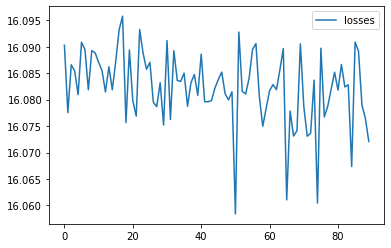

In [20]:
# plot the loss
import matplotlib.pyplot as plt
# plot the log loss
# plt.plot(losses[10:], label = 'losses')
plt.plot(losses_2[10:], label = 'losses_2')
plt.legend(['losses', 'losses_2'])
plt.show()


In [ ]:
mat_contents['XX'][:,:,0]

In [24]:
# max value of each column
max_values = np.max(mat_contents['XX'], axis=0)
# min value of each column
min_values = np.min(mat_contents['XX'], axis=0)

area = max_values-min_values
# print(area)
# divide 4,9,16 parts of the area
area_limit4 = area/2
# area_limit9 = area/3
# area_limit16 = area/4
# select the data points if locate in min_value+area_limit
data_points_1s = []
data_points_2s = []
data_points_3s = []
data_points_4s = []
for i in range(mat_contents['XX'].shape[2]):
    data_points_1 = []
    data_points_2 = []
    data_points_3 = []
    data_points_4 = []
    for data_point in mat_contents['XX'][:,:,i]:
        if data_point[0] < min_values[0][i]+area_limit4[0][i] and data_point[1] < min_values[1][i]+area_limit4[1][i]:
            # print(data_point)
            data_points_1.append(data_point)
        elif data_point[0] > min_values[0][i]+area_limit4[0][i] and data_point[1] < min_values[1][i]+area_limit4[1][i]:
            # print(data_point)
            data_points_2.append(data_point)
        elif data_point[0] < min_values[0][i]+area_limit4[0][i] and data_point[1] > min_values[1][i]+area_limit4[1][i]:
            # print(data_point)
            data_points_3.append(data_point)
        else:
            # print(data_point)
            data_points_4.append(data_point)
    # turn the data_points into array
    data_points_1 = np.array(data_points_1)
    data_points_2 = np.array(data_points_2)
    data_points_3 = np.array(data_points_3)
    data_points_4 = np.array(data_points_4)
    data_points_1s.append(data_points_1)
    data_points_2s.append(data_points_2)
    data_points_3s.append(data_points_3)
    data_points_4s.append(data_points_4)


print(data_points_1s)
print(data_points_2s)
print(data_points_3s)
print(data_points_4s)



[array([[24.52017984,  1.38556931],
       [21.60755502, 53.78158626],
       [28.47680679, 53.98061852],
       [23.16360078, 28.79322928],
       [19.51523112, 35.26907779],
       [22.62615214,  1.98932047],
       [23.13440954, 23.10505422],
       [16.31120814, 37.21596052],
       [20.94570644, 45.1640171 ],
       [34.48715599, 14.09202669],
       [17.3338087 ,  1.36060445],
       [46.83573667, 32.72350539],
       [20.59559186, 14.72138929],
       [12.4945806 ,  7.07115115],
       [22.70623106, 22.60697968],
       [11.48855409,  5.29226784],
       [14.93781471, 34.49377625],
       [31.35460493, 18.02244111],
       [ 5.49795919, 18.37766471],
       [20.22335754,  9.44302248],
       [44.31169964, 41.06739025],
       [22.93799009,  2.26706348],
       [ 0.45462105, 31.14485492],
       [13.37977733, 33.8301742 ],
       [17.72583753,  0.24258733],
       [30.3313277 ,  7.65024555],
       [35.69580842, 48.79268719],
       [36.65728026, -0.83994295]]), array([[20.246998

In [25]:
len(data_points_1s)

50

In [35]:
# import torch
# from torch.utils.data import TensorDataset
x = torch.rand(3, 2)
y = torch.rand(3)
xy = TensorDataset(x, y)
print(x)
# take x out from xy
xs = xy[:][0]
print(xs)

tensor([[0.6680, 0.6154],
        [0.8067, 0.4143],
        [0.0035, 0.8661]])
tensor([[0.6680, 0.6154],
        [0.8067, 0.4143],
        [0.0035, 0.8661]])


In [30]:
# max and min value of x
x_max = torch.max(x, 0)[0]
x_min = torch.min(x, 0)[0]
print(x_max)
print(x_min)

tensor([0.5540, 0.4314])
tensor([0.1325, 0.1116])


In [ ]:
from load_dataloader import Load_Dataloader
args = {'train_data': train_data, 'test_data': test_data,
        'num_clients':num_clients, 'split': 'area_grid',
        'grid_size':(2,2),'weight_ratio':'sample_power'}
train_loaders, test_loaders, test_loader_global, y_power_ratios = Load_Dataloader(args)

In [1]:
import torch
import scipy.io as sio
import numpy as np
# load the mat file of fl0_R2
rmsx = sio.loadmat('data/matlab/fl0_R2/rmsx.mat')
rmsx = rmsx['rmsx']
rmsy = sio.loadmat('data/matlab/fl0_R2/rmsy.mat')
rmsy = rmsy['rmsy']
mle_rmsx = sio.loadmat('data/matlab/fl0_R2/mle_rmsx.mat')
mle_rmsx = mle_rmsx['mle_rmsx']
mle_rmsy = sio.loadmat('data/matlab/fl0_R2/mle_rmsy.mat')
mle_rmsy = mle_rmsy['mle_rmsy']
crbx = sio.loadmat('data/matlab/fl0_R2/crbx.mat')
crbx = crbx['crbx']
crby = sio.loadmat('data/matlab/fl0_R2/crby.mat')
crby = crby['crby']
# load the mat file of fl1_C4_R2
rmsx = sio.loadmat('data/matlab/fl1_C4_R2/rmsx.mat')
rmsx = rmsx['rmsx']
rmsy = sio.loadmat('data/matlab/fl1_C4_R2/rmsy.mat')
rmsy = rmsy['rmsy']
mle_rmsx = sio.loadmat('data/matlab/fl1_C4_R2/mle_rmsx.mat')
mle_rmsx = mle_rmsx['mle_rmsx']
mle_rmsy = sio.loadmat('data/matlab/fl1_C4_R2/mle_rmsy.mat')
mle_rmsy = mle_rmsy['mle_rmsy']
crbx = sio.loadmat('data/matlab/fl1_C4_R2/crbx.mat')
crbx = crbx['crbx']
crby = sio.loadmat('data/matlab/fl1_C4_R2/crby.mat')
crby = crby['crby']


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import plotly.graph_objects as go
# load the mat files
files = ['data/matlab/fl0_R2', 'data/matlab/fl1_C4_R2', 'data/matlab/fl1_C6_R2', 'data/matlab/fl1_C9_R2']
fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()
for file in files:
    rmsx = sio.loadmat(file+'/rmsx.mat')
    rmsx = rmsx['rmsx']
    rmsy = sio.loadmat(file+'/rmsy.mat')
    rmsy = rmsy['rmsy']
    mle_rmsx = sio.loadmat(file+'/mle_rmsx.mat')
    mle_rmsx = mle_rmsx['mle_rmsx']
    mle_rmsy = sio.loadmat(file+'/mle_rmsy.mat')
    mle_rmsy = mle_rmsy['mle_rmsy']
    crbx = sio.loadmat(file+'/crbx.mat')
    crbx = crbx['crbx']
    crby = sio.loadmat(file+'/crby.mat')
    crby = crby['crby']

    # plot the rmsx
    fig1.add_trace(go.Scatter(x=np.arange(1, 101), y=rmsx[0, :], mode='lines+markers', name=file[-5:]+'rmsx'))
    fig1.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmsx[0, :], mode='lines+markers', name=file[-5:]+'mle_rmsx'))
    fig1.add_trace(go.Scatter(x=np.arange(1, 101), y=crbx[0, :], mode='lines+markers', name=file[-5:]+'crbx'))
    fig1.update_layout(title='rmsx', xaxis_title='iteration', yaxis_title='rmsx')
    fig2.add_trace(go.Scatter(x=np.arange(1, 101), y=rmsy[0, :], mode='lines+markers', name=file[-5:]+'rmsy'))
    fig2.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmsy[0, :], mode='lines+markers', name=file[-5:]+'mle_rmsy'))
    fig2.add_trace(go.Scatter(x=np.arange(1, 101), y=crby[0, :], mode='lines+markers', name=file[-5:]+'crby'))
    fig2.update_layout(title='rmsy', xaxis_title='iteration', yaxis_title='rmsy')
    # mean square error of x and y in each iteration
    rmse = np.sqrt(np.square(rmsx)+np.square(rmsy))
    mle_rmse = np.sqrt(np.square(mle_rmsx)+np.square(mle_rmsy))
    crb = np.sqrt(np.square(crbx)+np.square(crby))
    fig3.add_trace(go.Scatter(x=np.arange(1, 101), y=rmse[0, :], mode='lines+markers', name=file[-5:]+'rmse'))
    fig3.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmse[0, :], mode='lines+markers', name=file[-5:]+'mle_rmse'))
    fig3.add_trace(go.Scatter(x=np.arange(1, 101), y=crb[0, :], mode='lines+markers', name=file[-5:]+'crb'))
    fig3.update_layout(title='rmse', xaxis_title='iteration', yaxis_title='rmse')
fig1.show()
fig2.show()
fig3.show()



In [ ]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import plotly.graph_objects as go
# load the mat files
files = ['data/matlab/fl0_R12', 'data/matlab/fl1_C4_R12', 'data/matlab/fl1_C6_R12', 'data/matlab/fl1_C8_R12']
fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()
for file in files:
    rmsx = sio.loadmat(file+'/rmsx.mat')
    rmsx = rmsx['rmsx']
    rmsy = sio.loadmat(file+'/rmsy.mat')
    rmsy = rmsy['rmsy']
    mle_rmsx = sio.loadmat(file+'/mle_rmsx.mat')
    mle_rmsx = mle_rmsx['mle_rmsx']
    mle_rmsy = sio.loadmat(file+'/mle_rmsy.mat')
    mle_rmsy = mle_rmsy['mle_rmsy']
    crbx = sio.loadmat(file+'/crbx.mat')
    crbx = crbx['crbx']
    crby = sio.loadmat(file+'/crby.mat')
    crby = crby['crby']

    # plot the rmsx
    fig1.add_trace(go.Scatter(x=np.arange(1, 101), y=rmsx[0, :], mode='lines+markers', name=file[-5:]+'rmsx'))
    fig1.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmsx[0, :], mode='lines+markers', name=file[-5:]+'mle_rmsx'))
    fig1.add_trace(go.Scatter(x=np.arange(1, 101), y=crbx[0, :], mode='lines+markers', name=file[-5:]+'crbx'))
    fig1.update_layout(title='rmsx', xaxis_title='iteration', yaxis_title='rmsx')
    fig2.add_trace(go.Scatter(x=np.arange(1, 101), y=rmsy[0, :], mode='lines+markers', name=file[-5:]+'rmsy'))
    fig2.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmsy[0, :], mode='lines+markers', name=file[-5:]+'mle_rmsy'))
    fig2.add_trace(go.Scatter(x=np.arange(1, 101), y=crby[0, :], mode='lines+markers', name=file[-5:]+'crby'))
    fig2.update_layout(title='rmsy', xaxis_title='iteration', yaxis_title='rmsy')
    # mean square error of x and y in each iteration
    rmse = np.sqrt(np.square(rmsx)+np.square(rmsy))
    mle_rmse = np.sqrt(np.square(mle_rmsx)+np.square(mle_rmsy))
    crb = np.sqrt(np.square(crbx)+np.square(crby))
    fig3.add_trace(go.Scatter(x=np.arange(1, 101), y=rmse[0, :], mode='lines+markers', name=file[-5:]+'rmse'))
    fig3.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmse[0, :], mode='lines+markers', name=file[-5:]+'mle_rmse'))
    fig3.add_trace(go.Scatter(x=np.arange(1, 101), y=crb[0, :], mode='lines+markers', name=file[-5:]+'crb'))
    fig3.update_layout(title='rmse', xaxis_title='iteration', yaxis_title='rmse')
fig1.show()
fig2.show()
fig3.show()



In [13]:


# plot the rmsx
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, 101), y=rmsx[0, :], mode='lines+markers', name='rmsx'))
# fig.add_trace(go.Scatter(x=np.arange(1, 101), y=rmsy[0, :], mode='lines', name='rmsy'))
fig.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmsx[0, :], mode='lines+markers', name='mle_rmsx'))
# fig.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmsy[0, :], mode='lines', name='mle_rmsy'))
fig.add_trace(go.Scatter(x=np.arange(1, 101), y=crbx[0, :], mode='lines+markers', name='crbx'))
# fig.add_trace(go.Scatter(x=np.arange(1, 101), y=crby[0, :], mode='lines', name='crby'))
fig.show()



# Compare factors
## Number of Clients
## The different weight_ratios

In [7]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import plotly.graph_objects as go
import scipy.io as sio

grid_sizes = [(1,2),(2,2),(2,3),(2,4)] #(1,2),(2,2),(2,3),
weight_ratios = ['power','sample']#,'sample_power']
data_names = ['PL2','R2','PL11','R11']
fl_pw = 1


for data_name in data_names:
    fig = go.Figure()
    for weight_ratio in weight_ratios:
        for grid_size in grid_sizes:
            # make the string of grid_size
            grid_size_str = str(grid_size)
            file = 'data/matlab/{}_fl1{}{}'.format(data_name,grid_size_str,weight_ratio)
            rmsx = sio.loadmat(file+'/rmsx.mat')
            rmsx = rmsx['rmsx']
            rmsy = sio.loadmat(file+'/rmsy.mat')
            rmsy = rmsy['rmsy']
            mle_rmsx = sio.loadmat(file+'/mle_rmsx.mat')
            mle_rmsx = mle_rmsx['mle_rmsx']
            mle_rmsy = sio.loadmat(file+'/mle_rmsy.mat')
            mle_rmsy = mle_rmsy['mle_rmsy']
            crbx = sio.loadmat(file+'/crbx.mat')
            crbx = crbx['crbx']
            crby = sio.loadmat(file+'/crby.mat')
            crby = crby['crby']
            # plot the rmsx
            rmse = np.sqrt(np.square(rmsx)+np.square(rmsy))
            mle_rmse = np.sqrt(np.square(mle_rmsx)+np.square(mle_rmsy))
            crb = np.sqrt(np.square(crbx)+np.square(crby))
            fig.add_trace(go.Scatter(x=np.arange(1, 101), y=rmse[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+'rmse'))
            fig.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmse[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+'mle_rmse'))
            fig.add_trace(go.Scatter(x=np.arange(1, 101), y=crb[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+'crb'))
            fig.update_layout(title=data_name, xaxis_title='iteration', yaxis_title='rmse')
    fig.show()

In [37]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import plotly.graph_objects as go
import scipy.io as sio
import os

grid_sizes = [(2,2),(2,3),(2,4),(3,4),(4,4),(4,5),(4,6),(4,7)] #(1,2),(2,2),(2,3),(1,2),(2,2),,(2,4)
weight_ratios = ['sample','power']#,'sample_power']'power',
data_names = ['R11'] #'PL2','R2','PL11',
fl_pw = 1
algorithms = ['FedAvg','']
mus = ['1'] #'0.1','',

for data_name in data_names:
    fig = go.Figure()
    for weight_ratio in weight_ratios:
        for grid_size in grid_sizes:
            for algorithm in algorithms:
                for mu in mus:
                    # make the string of grid_size
                    grid_size_str = str(grid_size)
                    file = 'data/matlab/{}_fl1{}{}{}{}'.format(data_name,grid_size_str,weight_ratio,algorithm,mu)
                    # if file name not exist, continue
                    if not os.path.exists(file):
                        continue
                    rmsx = sio.loadmat(file+'/rmsx.mat')
                    rmsx = rmsx['rmsx']
                    rmsy = sio.loadmat(file+'/rmsy.mat')
                    rmsy = rmsy['rmsy']
                    mle_rmsx = sio.loadmat(file+'/mle_rmsx.mat')
                    mle_rmsx = mle_rmsx['mle_rmsx']
                    mle_rmsy = sio.loadmat(file+'/mle_rmsy.mat')
                    mle_rmsy = mle_rmsy['mle_rmsy']
                    crbx = sio.loadmat(file+'/crbx.mat')
                    crbx = crbx['crbx']
                    crby = sio.loadmat(file+'/crby.mat')
                    crby = crby['crby']
                    # plot the rmsx
                    rmse = np.sqrt(np.square(rmsx)+np.square(rmsy))
                    mle_rmse = np.sqrt(np.square(mle_rmsx)+np.square(mle_rmsy))
                    crb = np.sqrt(np.square(crbx)+np.square(crby))
                    fig.add_trace(go.Scatter(x=np.arange(1, 101), y=rmse[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+algorithm+mu+'rmse'))
                    fig.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmse[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+algorithm+mu+'mle_rmse'))
                    fig.add_trace(go.Scatter(x=np.arange(1, 101), y=crb[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+algorithm+mu+'crb'))
                    fig.update_layout(title=data_name, xaxis_title='iteration', yaxis_title='rmse')
    fig.show()

In [14]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import plotly.graph_objects as go
import scipy.io as sio
import os

# grid_sizes = [(2,2),(2,3),(2,4),(3,4),(4,4),(4,5),(4,6),(4,7)] #(2,2),(2,3),(2,4),(3,4), (1,2),(2,2),(2,3),(1,2),(2,2),,(2,4)
# weight_ratios = ['sample','power']#,'sample_power']'power',
# data_names = ['R2'] #'PL2','R2','PL11',
grid_sizes = [(5,10)]#'2points','point',(2,2),,,(2,2),(2,3),(2,4),(3,4),(4,4),(4,5),(4,6),(4,7)] #(2,2),(2,4), (4,4),(4,5),(2,2),(2,4),(1,2),(2,2),(2,3),(1,2),(2,2),,(2,4)
weight_ratios = ['equal','sample']#'sample_power']'power','sample','power',
data_names = ['R13']#,'R11']#,'PL2','PL11','R2']
fl_pw = 1
algorithms = ['Fedavg','PowerFedAvg']
# mus = ['0'] #'0.1','',
model_modes = ['NN','both']#,'PL', 'both',

for data_name in data_names:
    fig = go.Figure()
    rmses_all = []
    for weight_ratio in weight_ratios:
        rmses = []
        for grid_size in grid_sizes:
            for algorithm in algorithms:
                # for mu in mus:
                for model_mode in model_modes:
                    # make the string of grid_size
                    grid_size_str = str(grid_size)
                    file = 'data/matlab/{}_fl1{}{}{}{}'.format(data_name,grid_size_str,weight_ratio,algorithm,model_mode)
                    # if file name not exist, continue
                    if not os.path.exists(file):
                        continue
                    rmsx = sio.loadmat(file+'/rmsx.mat')
                    rmsx = rmsx['rmsx']
                    rmsy = sio.loadmat(file+'/rmsy.mat')
                    rmsy = rmsy['rmsy']
                    # mle_rmsx = sio.loadmat(file+'/mle_rmsx.mat')
                    # mle_rmsx = mle_rmsx['mle_rmsx']
                    # mle_rmsy = sio.loadmat(file+'/mle_rmsy.mat')
                    # mle_rmsy = mle_rmsy['mle_rmsy']
                    # crbx = sio.loadmat(file+'/crbx.mat')
                    # crbx = crbx['crbx']
                    # crby = sio.loadmat(file+'/crby.mat')
                    # crby = crby['crby']
                    # plot the rmsx
                    rmse = np.sqrt(np.square(rmsx)+np.square(rmsy))
                    # mle_rmse = np.sqrt(np.square(mle_rmsx)+np.square(mle_rmsy))
                    # crb = np.sqrt(np.square(crbx)+np.square(crby))
                    fig.add_trace(go.Scatter(x=np.arange(1, 101), y=rmse[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+algorithm+model_mode+'rmse'))
                    # fig.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmse[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+algorithm+mu+'mle_rmse'))
                    # fig.add_trace(go.Scatter(x=np.arange(1, 101), y=crb[0, :], mode='lines+markers', name=weight_ratio+grid_size_str+algorithm+mu+'crb'))
                    fig.update_layout(title=data_name, xaxis_title='iteration', yaxis_title='rmse')
                    print(f'{grid_size}_{weight_ratio}_mse:\n',rmse[0, :])
                    for m in range(len(rmse[0, :])):
                        if m ==3:
                            print((m+1,rmse[0, m]))
                    rmses.append(rmse[0, :])
        rmses_all.append(rmses)
                        
                    # print('mle_mse:\n',mle_rmse[0, :])
                    # print('crb:\n',crb[0, :])
    fig.show()

(5, 10)_sample_mse:
 [34.00278433 34.17169588 34.90247451 34.30735039 32.16371643]
(4, 34.30735039462731)
(5, 10)_sample_mse:
 [12641523.7699849   9644081.37837175 17055622.89565388 11140423.64113805
 17136634.5395648 ]
(4, 11140423.641138047)
(5, 10)_sample_mse:
 [34.00278433 34.17169588 34.90247451 34.30735039 32.16371643]
(4, 34.30735039462731)
(5, 10)_sample_mse:
 [34.00278433 34.17169588 34.90247451 34.30735039 32.16371643]
(4, 34.30735039462731)


In [49]:
# turn the rmses to a table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = go.Figure()
for j,rmses in enumerate(rmses_all):
    if j ==0:
        weight_ratio = 'sample'
    elif j ==1:
        weight_ratio = 'power'
    rmses = np.stack(rmses)
    print(rmses.shape)
    for i in range(rmses.shape[1]):
        fig.add_trace(go.Scatter(x=np.arange(1, 101), y=rmses[:, i], mode='lines+markers', name=f'{weight_ratio}_{i}_rmse'))
        fig.update_layout(title=data_name, xaxis_title='iteration', yaxis_title='rmse')
fig.show()


(8, 5)
(8, 5)


In [88]:
# plot the data
# files = ['data/matlab/R2_fl1(5, 5)powerFedprox-PL0','data/matlab/R2_fl1(5, 5)powerFedprox-PL0.1',\
#     'data/matlab/R2_fl1(5, 5)powerFedprox-PL1','data/matlab/R2_fl1(5, 5)powerFedprox-PL10','data/matlab/R2_fl1(5, 5)powerFedprox-PL100']#'data/matlab/R2_fl1pointsampleFedAvg1']#,'data/matlab/PL2_fl0','data/matlab/R2_fl0','data/matlab/PL11_fl0','data/matlab/R11_fl0']
files = ["data/matlab/R12_fl1(10, 10)powerFedavg0",'data/matlab/R12_fl1(10, 10)sampleFedavg0']
fig = go.Figure()
for file in files:
    rmsx = sio.loadmat(file+'/rmsx.mat')
    rmsx = rmsx['rmsx']
    rmsy = sio.loadmat(file+'/rmsy.mat')
    rmsy = rmsy['rmsy']
    # mle_rmsx = sio.loadmat(file+'/mle_rmsx.mat')
    # mle_rmsx = mle_rmsx['mle_rmsx']
    # mle_rmsy = sio.loadmat(file+'/mle_rmsy.mat')
    # mle_rmsy = mle_rmsy['mle_rmsy']
    # crbx = sio.loadmat(file+'/crbx.mat')
    # crbx = crbx['crbx']
    # crby = sio.loadmat(file+'/crby.mat')
    # crby = crby['crby']
    # plot the rmsx
    rmse = np.sqrt(np.square(rmsx)+np.square(rmsy))
    mle_rmse = np.sqrt(np.square(mle_rmsx)+np.square(mle_rmsy))
    crb = np.sqrt(np.square(crbx)+np.square(crby))
    fig.add_trace(go.Scatter(x=np.arange(1, 101), y=rmse[0, :], mode='lines+markers', name=f'{file}rmse'))
    # fig.add_trace(go.Scatter(x=np.arange(1, 101), y=mle_rmse[0, :], mode='lines+markers', name=f'{file}mle_rmse'))
    # fig.add_trace(go.Scatter(x=np.arange(1, 101), y=crb[0, :], mode='lines+markers', name=f'{file}crb'))
    fig.update_layout(title=data_name, xaxis_title='iteration', yaxis_title='rmse')
    print(f'{file}mse:\n',rmse[0, :])
    # print(f'{file}mle_mse:\n',mle_rmse[0, :])
    # print(f'{file}crb:\n',crb[0, :])
fig.show()

data/matlab/R12_fl1(10, 10)powerFedavg0mse:
 [0. 0. 0. 0. 0.]
data/matlab/R12_fl1(10, 10)sampleFedavg0mse:
 [6.28593367 7.94737727 6.38441586 6.47327736 6.38164904]


In [64]:
from math import sqrt
from joblib import Parallel, delayed

def main(i):
    return sqrt(i ** 2),i
print([main(i) for i in range(10)])
Parallel(n_jobs=4)(delayed(main)(i) for i in range(10))

[(0.0, 0), (1.0, 1), (2.0, 2), (3.0, 3), (4.0, 4), (5.0, 5), (6.0, 6), (7.0, 7), (8.0, 8), (9.0, 9)]


[(0.0, 0),
 (1.0, 1),
 (2.0, 2),
 (3.0, 3),
 (4.0, 4),
 (5.0, 5),
 (6.0, 6),
 (7.0, 7),
 (8.0, 8),
 (9.0, 9)]

In [73]:
for i in range(0, 8, 2):
    print(i)

0
2
4
6


In [2]:
import torch

def partition_space(x, y, num_partitions_x1, num_partitions_x2):
    # Determine the bounds of the area
    min_x1, min_x2 = torch.min(x, dim=0).values
    max_x1, max_x2 = torch.max(x, dim=0).values

    # Calculate the size of each partition
    partition_size_x1 = (max_x1 - min_x1) / num_partitions_x1
    partition_size_x2 = (max_x2 - min_x2) / num_partitions_x2

    # Function to determine the partition index for a given coordinate
    def get_partition_index(coord, min_coord, partition_size, num_partitions):
        # Calculate index and use clamp to keep it within valid range
        index = ((coord - min_coord) / partition_size).long()
        return index.clamp(0, num_partitions - 1)

    # Assign each point to a partition
    partition_indices = torch.zeros(x.size(0), 2, dtype=torch.long)
    for i, (x1, x2) in enumerate(x):
        partition_indices[i, 0] = get_partition_index(x1, min_x1, partition_size_x1, num_partitions_x1)
        partition_indices[i, 1] = get_partition_index(x2, min_x2, partition_size_x2, num_partitions_x2)

    # Create a dictionary to hold the partitioned data
    partitioned_data = {}
    for i, indices in enumerate(partition_indices):
        # Tuple index for the partition
        partition_idx = tuple(indices.tolist())
        if partition_idx not in partitioned_data:
            partitioned_data[partition_idx] = {'x': [], 'y': []}
        partitioned_data[partition_idx]['x'].append(x[i])
        partitioned_data[partition_idx]['y'].append(y[i])

    # Convert lists to tensors
    for partition_idx in partitioned_data:
        partitioned_data[partition_idx]['x'] = torch.stack(partitioned_data[partition_idx]['x'])
        partitioned_data[partition_idx]['y'] = torch.tensor(partitioned_data[partition_idx]['y'])

    return partitioned_data

# Example usage:
x = torch.tensor([[1, 3], [2, 5], [4, 1], [5, 6]])
y = torch.tensor([10, 20, 30, 40])
num_partitions_x1 = 1
num_partitions_x2 = 2

partitioned_data = partition_space(x, y, num_partitions_x1, num_partitions_x2)

for partition_idx, data in partitioned_data.items():
    print(f"Partition {partition_idx}:")
    print(f"Locations (x): {data['x']}")
    print(f"Measurements (y): {data['y']}\n")


Partition (0, 0):
Locations (x): tensor([[1, 3],
        [4, 1]])
Measurements (y): tensor([10, 30])

Partition (0, 1):
Locations (x): tensor([[2, 5],
        [5, 6]])
Measurements (y): tensor([20, 40])



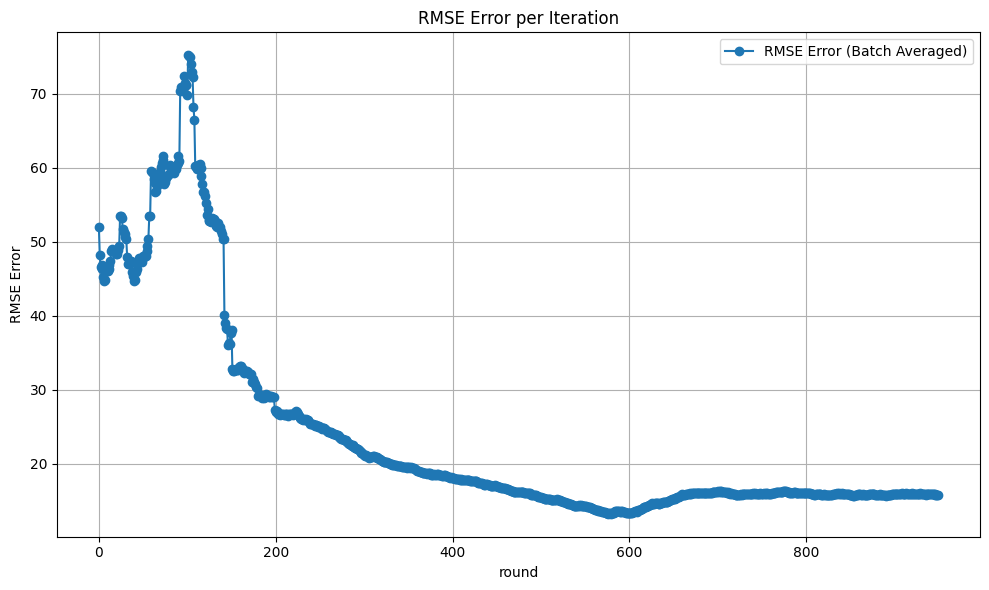

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data provided by the user
rmse_errors = [
    15.850840309389715, 15.264758668444625, 15.711663373765498, 15.4551195182698, 16.39240013072604,
    14.236636079885674, 13.268518298013046, 13.361766440363406, 14.351147677055199, 15.332895998702273,
    16.270158502704923, 14.57161437116449, 15.975952908752697, 12.857003429474812, 12.136557264232906,
    10.020146591635838, 12.46117983007866, 12.619022622982675, 10.371320810834394, 9.76468752927184,
    6.426494386905449, 7.933386441932728, 7.130586603236568, 9.976919867042685, 6.180074626604257,
    10.401807235607487, 9.807195506941891, 7.974595477151055, 7.509784225545944, 8.100316844577712,
    8.451872631133956, 8.257829059488355, 8.103388227160096, 7.809048079650185, 6.866204865048145,
    8.826329614840429, 7.939521510165514, 8.281798080234168, 8.24648801159044, 8.925901768082607
]
# read the data from the csv file
rmse_errors = pd.read_csv('results5/RT2_loc_nodes[2, 5]_theta(fix)_weight(normal)_20240228124744_fedporx_pl.csv')
rmse_errors1 = pd.read_csv('results5/RT2_loc_nodes[2, 5]_theta(fix)_weight(normal)_20240228135625_fedavg.csv')
rmse_loss = pd.read_csv('results5/RT2_results_loss.csv')
# convert rmse_errors to list
rmse_errors = rmse_errors['loc_error'].tolist()

# Calculate batch size markers
batch = 1
batch_sizes = [(i+1) * batch for i in range(len(rmse_errors) // batch)]

# Creating the figure and the plot
plt.figure(figsize=(10, 6))
# plt.plot(rmse_errors, label='RMSE Error_fedprox_pl', marker='o')
# plt.plot(rmse_errors1, label='RMSE Error1_fedavg', marker='o')
# plt.plot(rmse_loss, label='loss', marker='o')
# plot the rmse_loss with the batch_sizes, each size average the rmse_errors
window_len = 50
plt.plot([np.mean(rmse_loss[i:i+window_len]) for i in range(0, len(rmse_loss)-window_len)], label='RMSE Error (Batch Averaged)', marker='o')

# the x is too dense, so we use the batch_sizes to represent the x
# plt.xticks(batch_sizes, labels=[f'{i+1}' for i in range(len(batch_sizes))])
# plt.xlabel('Iteration (every 5th iteration represents a batch)')
plt.xlabel('round')
plt.ylabel('RMSE Error')
plt.title('RMSE Error per Iteration')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
# plot the data using plotly
import plotly.graph_objects as go
import numpy as np
import scipy.io as sio
import numpy as np
# load the mat file of fl0_R2
rmsx = sio.loadmat('datasets/dataPLANS/4.definitive/RT2/X.mat')
rmsx = rmsx['XX'][:,:,1]
rmsy = sio.loadmat('datasets/dataPLANS/4.definitive/RT2/Y.mat')
rmsy = rmsy['YY'][:,1]
# print(rmsx)
# print(rmsy.shape)

# rmsx is the location, rmsy is the filed value, plot the 3d field value
fig = go.Figure(data=[go.Scatter3d(x=rmsx[:,0], y=rmsx[:,1], z=rmsy, mode='markers')])
fig.show()




In [2]:
# plot the field value using interpolation
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import plotly.graph_objects as go
import scipy.io as sio
from scipy.interpolate import griddata
# load the mat file of fl0_R2
rmsx = sio.loadmat('datasets/dataPLANS/4.definitive/RT2/X.mat')
rmsx = rmsx['XX'][:,:,0]
rmsy = sio.loadmat('datasets/dataPLANS/4.definitive/RT2/Y.mat')
rmsy = rmsy['YY'][:,0]

# print(max(rmsx[:,0]),min(rmsx[:,0]))
# print(max(rmsx[:,1]),min(rmsx[:,1]))
# print(rmsx)
# print(rmsy)
# Masking NaN values
nan_indices = np.isnan(rmsy)  # True for NaNs
inf_indices = np.isinf(rmsy)
either_nan_or_inf = nan_indices | inf_indices
rmsx = rmsx[~either_nan_or_inf]
rmsy = rmsy[~either_nan_or_inf]
# print(rmsy)
# create a grid of points
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)
# print(X)
# interpolate the field value using griddata
Z = griddata(rmsx, rmsy, (X, Y), method='linear')
print(np.isnan(Z).any())  # Should be False
# print(Z)
# plot the field value
fig = go.Figure(data=[go.Surface(z=Z)])
fig.update_layout(title='3D Surface Plot', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()



True


In [3]:
import numpy as np
import matplotlib
import plotly.graph_objects as go
import scipy.io as sio
from scipy.interpolate import griddata
# load the mat file of fl0_R2
rmsx = sio.loadmat('datasets/dataPLANS/4.definitive/RT12/X.mat')
rmsx = rmsx['XX'][:,:,0]
rmsy = sio.loadmat('datasets/dataPLANS/4.definitive/RT12/Y.mat')
rmsy = rmsy['YY'][:,0]

# print(max(rmsx[:,0]),min(rmsx[:,0]))
# print(max(rmsx[:,1]),min(rmsx[:,1]))

nan_indices = np.isnan(rmsy)  # True for NaNs
inf_indices = np.isinf(rmsy)
either_nan_or_inf = nan_indices | inf_indices
rmsx = rmsx[~either_nan_or_inf]
rmsy = rmsy[~either_nan_or_inf]
# print(rmsy)
# create a grid of points
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)
# print(X)
# interpolate the field value using griddata
Z = griddata(rmsx, rmsy, (X, Y), method='linear')
print(np.isnan(Z).any())  # Should be False
# print(Z)
# plot the field value
fig = go.Figure(data=[go.Surface(z=Z)])
fig.update_layout(title='3D Surface Plot', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()



True


In [5]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from scipy.optimize import minimize
import scipy.io as sio
# # Placeholder for the simulate_measurement function
# def simulate_measurement(x1, x2):
#     # Placeholder implementation - replace this with your actual function
#     return np.sin(x1) ** 2 + np.cos(x2) ** 2 + np.random.normal(0, 0.1)

# # Collect initial data
# X_train = np.random.uniform(-5, 5, (50, 2))  # Random locations
# y_train = np.array([simulate_measurement(x1, x2) for x1, x2 in X_train])  # Corresponding measurements
# load the mat file of fl0_R2
rmsx = sio.loadmat('datasets/dataPLANS/4.definitive/RT12/X.mat')
rmsx = rmsx['XX'][:,:,0]
rmsy = sio.loadmat('datasets/dataPLANS/4.definitive/RT12/Y.mat')
rmsy = rmsy['YY'][:,0]
nan_indices = np.isnan(rmsy)  # True for NaNs
inf_indices = np.isinf(rmsy)
either_nan_or_inf = nan_indices | inf_indices
rmsx = rmsx[~either_nan_or_inf]
rmsy = rmsy[~either_nan_or_inf]
# print(rmsy)
# Train surrogate model
gp = GaussianProcessRegressor().fit(rmsx, rmsy)

# Define the objective function for the optimizer to maximize the surrogate prediction
def objective(x):
    # Ensure x is reshaped to a 2D array and the output is a scalar
    pred = gp.predict(x.reshape(1, -1))
    return -pred[0]  # Negate because we're maximizing

# Optimization
x0 = np.array([20, 20])  # Initial guess
result = minimize(objective, x0, method='L-BFGS-B', bounds=[(0, 100), (0, 100)])

# Resulting optimal location
optimal_location = result.x

# Print optimal location
print(f"Optimal location: {optimal_location}")


Optimal location: [20. 20.]


true_loc: [55.07979026 70.81478226]


/Users/jononearth/Library/Python/3.11/lib/python/site-packages/sklearn/gaussian_process/kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/jononearth/Library/Python/3.11/lib/python/site-packages/sklearn/gaussian_process/kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Optimal location: [2.122282252778285, 9.118332713091084]
Maximum measurement: -7.555399759259646e-75


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

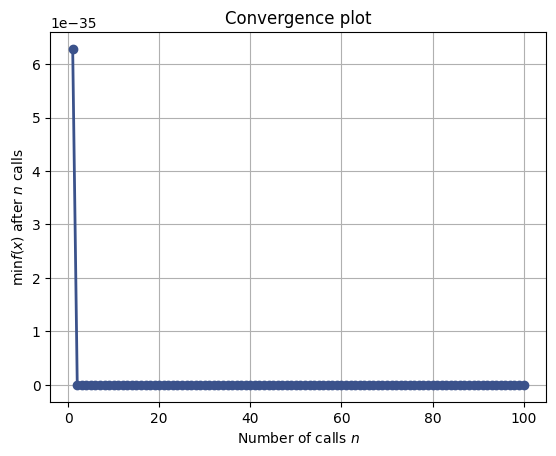

In [13]:
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
from sklearn.gaussian_process import GaussianProcessRegressor

rmsx = sio.loadmat('datasets/dataPLANS/4.definitive/RT12/X.mat')
rmsx = rmsx['XX'][:,:,0]
rmsy = sio.loadmat('datasets/dataPLANS/4.definitive/RT12/Y.mat')
rmsy = rmsy['YY'][:,0]
# load the true location and field value
true_loc = sio.loadmat('datasets/dataPLANS/4.definitive/RT2/trueJamLoc.mat')
true_loc = true_loc['Jloc'][0]
print("true_loc:",true_loc)
nan_indices = np.isnan(rmsy)  # True for NaNs
inf_indices = np.isinf(rmsy)
either_nan_or_inf = nan_indices | inf_indices
rmsx = rmsx[~either_nan_or_inf]
rmsy = rmsy[~either_nan_or_inf]
# print(rmsy)
# Train surrogate model
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern
# Define a more complex kernel
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) \
        + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10).fit(rmsx, rmsy)

# Define the space over which to search. Adjust the bounds as needed.
space  = [Real(0, 100, name='x1'), Real(0, 100, name='x2')]

# Objective function to minimize
# Since we are maximizing, we negate the predicted value from the GP regressor
@use_named_args(space)
def objective(**params):
    x = [params['x1'], params['x2']]
    pred = gp.predict([x])
    return -pred[0]  # Negate because gp_minimize seeks to minimize

# Perform Bayesian Optimization
result = gp_minimize(func=objective,                  # the function to minimize
                     dimensions=space,                # the bounds on each dimension of x
                     acq_func="LCB",                   # the acquisition function
                     n_calls=100,                     # the number of evaluations of f
                     n_random_starts=10)              # the number of random initialization points

# Optimal location
optimal_location = result.x
optimal_measurement = -result.fun

print(f"Optimal location: {optimal_location}")
print(f"Maximum measurement: {optimal_measurement}")

# Optionally, plot the convergence of the search process
plot_convergence(result)
